In [1]:
%matplotlib inline
import pylhe
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [14, 3]

# LHE File for "p p > H  j, H > S S - MS= 55Gev BR = 17% ptj = 2000"
lhe_MS55 = pylhe.readLHE("Events/with_ptj2000/run_hss_mdm55/unweighted_events.lhe")

# LHE File for "p p > S S j - MS= 250Gev LHS = 12 ptj = 2000"
lhe_MS250 = pylhe.readLHE("Events/with_ptj2000/run_mdm250/unweighted_events.lhe")

# LHE File for "p p > S S j - MS= 500Gev LHS = 12 ptj = 2000"
lhe_MS500 = pylhe.readLHE("Events/with_ptj2000/run_ssj_mdm500/unweighted_events.lhe")

# LHE File for "p p > Z j, Z > vl vl~ "
lhe_zj= pylhe.readLHE("Events/with_ptj2000/run_zvlvl/unweighted_events.lhe")


def momenta(particles, transverse=False):
    total_momentum = 0
    p = [0, 0, 0]
    for ptc in particles:
        p[0] += ptc.px
        p[1] += ptc.py
        p[2] += ptc.pz

    if transverse == True:
        transverse_momentum = np.sqrt(p[0]**2 + p[1]**2)
        return transverse_momentum

    total_momentum = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
    return total_momentum

def invariant_mass(event, p_ids):
    matter = []
    e_total = [] 
    for ptc in event.particles:
        if ptc.id in p_ids:
            matter.append(ptc)
            e_total.append(ptc.e)
    return np.sqrt(sum(e_total)**2 - momenta(matter)**2)

def transverse_momentum(event, p_ids):
    matter = []
    for ptc in event.particles:
        if ptc.status > 0 and abs(ptc.id) in p_ids:
            matter.append(ptc)
    return momenta(matter, transverse=True)


jet_ids = [1, 2, 3, 4, 5, 6, 21]

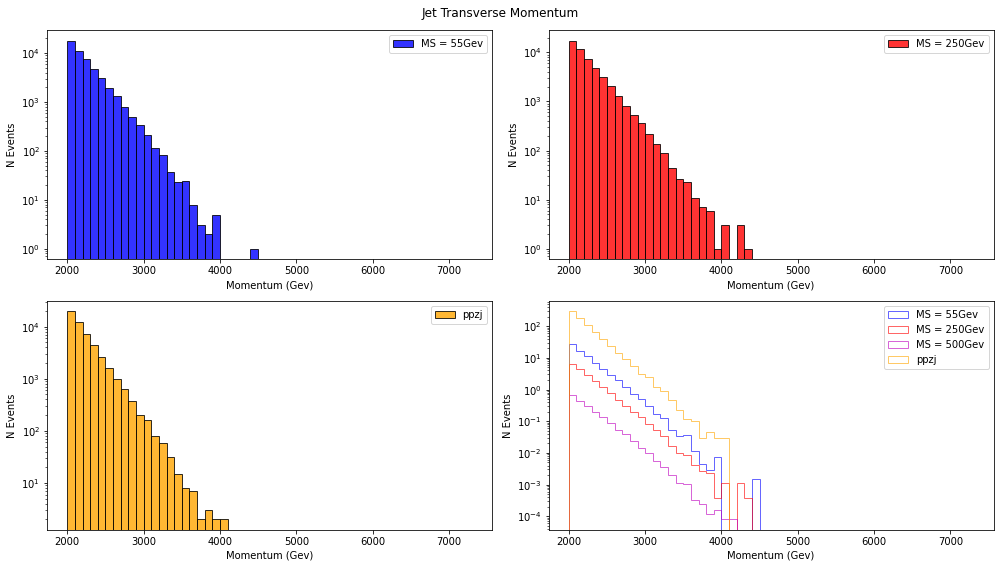

In [2]:
plt.rcParams['figure.figsize'] = [14, 8]
ms55_transverse_momentum = []
wms55 = [1.4774236344946001e-03]*50000
for event in lhe_MS55:
    pt = transverse_momentum(event, jet_ids)
    ms55_transverse_momentum.append(pt)

wms250 = [3.7864566107149996e-04]*50000
ms250_transverse_momentum = []
for event in lhe_MS250:
    pt = transverse_momentum(event, jet_ids)
    ms250_transverse_momentum.append(pt)

wms500 = [3.9849683204762e-05]*50000
ms500_transverse_momentum = []
for event in lhe_MS500:
    pt = transverse_momentum(event, jet_ids)
    ms500_transverse_momentum.append(pt)

wzj = [1.4995641800000001e-02]*50000
zj_transverse_momentum = []
for event in lhe_zj:
    pt = transverse_momentum(event, jet_ids)
    zj_transverse_momentum.append(pt)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
bins = range(2000, 7400, 100)

# histogram for "p p > H  j, H > S S - MS= 55Gev"
ax1.hist(ms55_transverse_momentum, bins = bins, alpha=0.8, color='blue', label='MS = 55Gev', log=True, edgecolor='black')
ax1.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax1.legend()

# histogram for "p p > H  j, H > S S - MS= 250Gev"
ax2.hist(ms250_transverse_momentum, bins = bins, alpha=0.8, color='red', label='MS = 250Gev', log=True, edgecolor='black')
ax2.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax2.legend()

# histogram for "p p > Z j, Z > trvl vl~ "
ax3.hist(zj_transverse_momentum, bins = bins, alpha=0.8, color='orange', label='ppzj', log=True, edgecolor='black')
ax3.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax3.legend()

# histogram for "p p > H  j, H > S S and p p > Z j, Z > vl vl~ "
ax4.hist(ms55_transverse_momentum, bins = bins, alpha=0.6, color='blue', label='MS = 55Gev', log=True, edgecolor='blue',
histtype='step', weights= wms55 )
ax4.hist(ms250_transverse_momentum, bins = bins, alpha=0.6, color='red', label='MS = 250Gev', log=True, edgecolor='red',histtype='step', weights= wms250)
ax4.hist(ms500_transverse_momentum, bins = bins, alpha=0.6, color='m', label='MS = 500Gev', log=True, edgecolor='m', histtype='step', weights= wms500)
ax4.hist(zj_transverse_momentum, bins = bins, alpha=0.6, color='orange', label='ppzj', log=True, edgecolor='orange', histtype='step', weights= wzj)
ax4.set(xlabel='Momentum (Gev)', ylabel='N Events')
ax4.legend()

fig.suptitle('Jet Transverse Momentum')
fig.tight_layout()
plt.show()